# tensorflow图像处理函数

```bash
# 编解码处理
decode_jpeg
decode_png
# 图像大小调整
1. resize_images重新调整图片大小
2. resize_image_with_crop_or_pad 裁剪和填充
3. central_crop 按比例裁剪
# 图像翻转
1. 上下／随机上下翻转
2. 左右／随机左右翻转

# 图像色彩调整
1. 亮度
2. 对比度
3. 色相
4. 饱和度
5. 图像标准化

# 处理标注框



```

In [60]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# 图像编解码处理
# 读取图像的原始信息
image_raw_data = tf.gfile.FastGFile('/Users/xxx/Documents/shell/datasets/cat.jpg', 'r').read()

with tf.Session() as sess:
    # 使用jpeg的格式解码器从而得到图像对应的三维矩阵
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    print img_data.eval()
    print img_data.get_shape()



[[[163 161 140]
  [163 161 138]
  [163 161 140]
  ..., 
  [106 139  48]
  [101 137  47]
  [104 140  52]]

 [[164 162 141]
  [164 162 139]
  [163 161 138]
  ..., 
  [107 138  45]
  [103 138  46]
  [108 138  50]]

 [[167 162 142]
  [167 162 140]
  [164 162 139]
  ..., 
  [105 136  42]
  [103 137  43]
  [108 139  46]]

 ..., 
 [[207 200 181]
  [207 200 181]
  [206 199 180]
  ..., 
  [109  84  54]
  [109  83  56]
  [107  82  52]]

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ..., 
  [108  83  52]
  [106  81  51]
  [106  81  50]]

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ..., 
  [109  85  51]
  [107  82  51]
  [106  81  50]]]
(?, ?, ?)


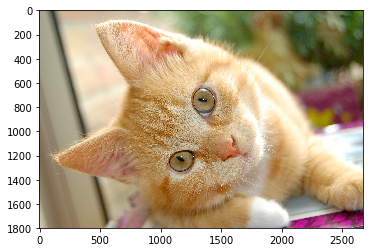

In [62]:
# 展示图片
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

In [63]:
# 保存图片

img_data_convert = tf.image.convert_image_dtype(img_data, dtype=tf.float32)
# 将表示一张图像的三维矩阵重新按着jpeg格式编码并存入文件中
encode_image = tf.image.encode_jpeg(img_data)
with tf.Session() as sess:
    with tf.gfile.GFile('/data/output', 'wb') as f:
        f.write(encode_image.eval())


# 图像大小调整

Digital type:  <dtype: 'float32'>
(?, ?, ?)


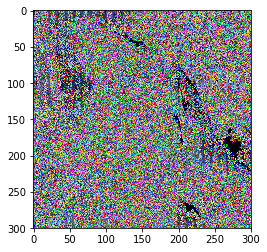

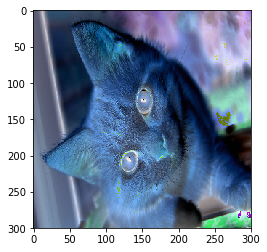

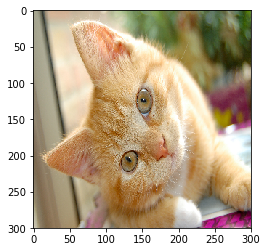

In [64]:
# 重新调整图片大小
with tf.Session() as sess:
    # method=0 双线性插值法
    # method=1最近邻居法
    # method=2 双三次插值法
    # method=3 面积插值法
    resized = tf.image.resize_images(img_data, 300, 300, method=0)
    print "Digital type: ", resized.dtype
    print img_data.get_shape()
    plt.imshow(resized.eval())
    plt.show()
    
    # tensorflow 喊出处理图片后存储的数据是float32格式的，需要转成unit8才能正确打印图片
    cat_img_data_int = np.asarray(resized.eval(), dtype='uint16')
    plt.imshow(cat_img_data_int)
    plt.show()
    
    # tensorflow 喊出处理图片后存储的数据是float32格式的，需要转成unit8才能正确打印图片
    cat_img_data_int = np.asarray(resized.eval(), dtype='uint8')
    plt.imshow(cat_img_data_int)
    plt.show()
    
    

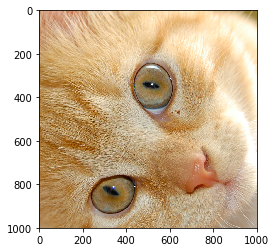

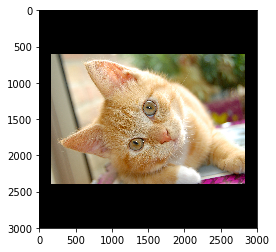

In [65]:
# 裁剪和填充
with tf.Session() as sess:
    img_data_run = sess.run(img_data)
    # r0.9输入必须得为sess.run后的值，才能可以，其它高版本未验证
    croped = tf.image.resize_image_with_crop_or_pad(img_data_run, 1000, 1000)
    paded = tf.image.resize_image_with_crop_or_pad(img_data_run, 3000, 3000)
    plt.imshow(croped.eval())
    plt.show()
    
    plt.imshow(paded.eval())
    plt.show()

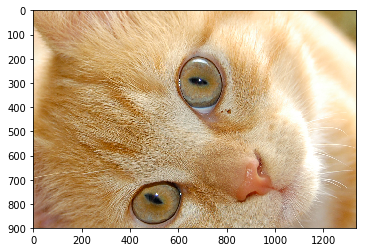

In [66]:
# 截取中间50%的图片
with tf.Session() as sess:
    central_cropped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(central_cropped.eval())
    plt.show()

# 翻转图片

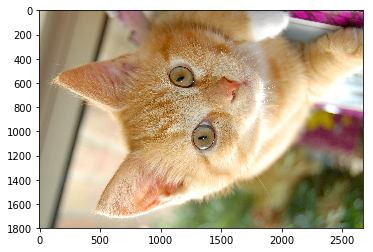

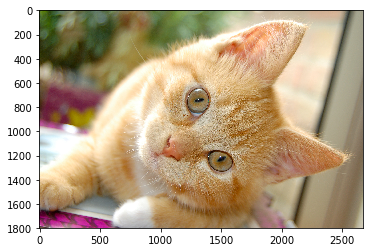

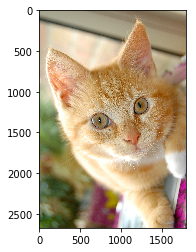

In [67]:
with tf.Session() as sess:
    # 上下翻转
    flipped = tf.image.flip_up_down(img_data)
    plt.imshow(flipped.eval())
    plt.show()
    # 左右翻转
    flipped1 = tf.image.flip_left_right(img_data)
    plt.imshow(flipped1.eval())
    plt.show()
    
    # 对角线翻转
    transposed = tf.image.transpose_image(img_data)
    plt.imshow(transposed.eval())
    plt.show()
    
    # 以一定概率上线翻转
#     flipped = tf.image.random_flip_up_down(img_data)
    # 以一定概率左右翻转
#     flipped = tf.image.random_flip_left_right(img_data)
    
    

# 图像色彩调整

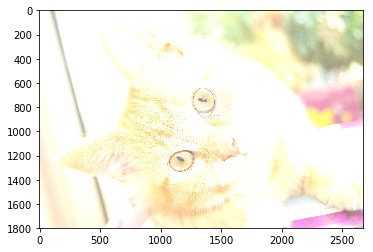

In [68]:
# 亮度调整
with tf.Session() as sess:
    # 将图像的亮度-0.5
    adjusted = tf.image.adjust_brightness(img_data, -0.5)
    adjusted = tf.image.adjust_brightness(img_data, 0.5)
    # 在[-max_delta， max_delta]范围内随机调整图像的亮度
#     adjusted = tf.image.random_brightness(img_data, max_delta)
    plt.imshow(adjusted.eval())
    plt.show()

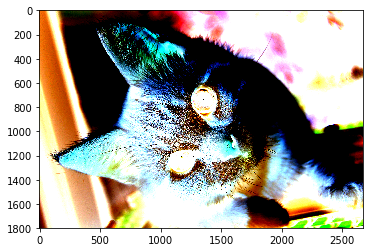

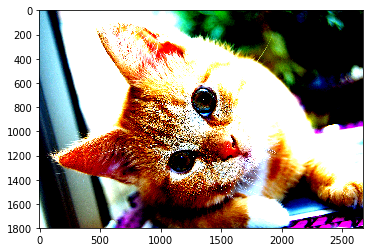

In [69]:
# 对比度调整
with tf.Session() as sess:
    adjusted = tf.image.adjust_contrast(img_data, -5)
    plt.imshow(adjusted.eval())
    plt.show()
    
    adjusted = tf.image.adjust_contrast(img_data, 5)
    plt.imshow(adjusted.eval())
    plt.show()
    
    # 在[lower，upper]的范围内随机调整图片的对比度
#     adjusted = tf.image.random_contrast(lower, upper)

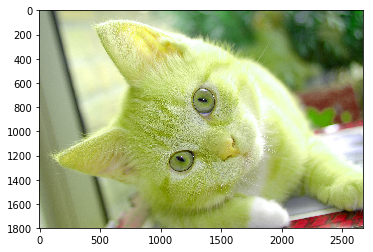

In [70]:
# 调整图片的色相
with tf.Session() as sss:
    adjusted = tf.image.adjust_hue(img_data, 0.1)
    # 在[-max_delta, max_delta]的范围随机调整图像的色相
    adjusted = tf.image.random_hue(img_data, max_delta)
    plt.imshow(adjusted.eval())
    plt.show()
    

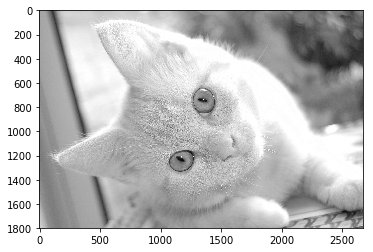

In [73]:
# 调整饱和度
with tf.Session() as sess:
    adjusted = tf.image.adjust_saturation(img_data, -5)
    plt.imshow(adjusted.eval())
    plt.show()

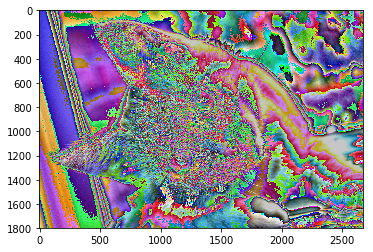

In [74]:
# 图像标准化的过程
# 将图像上的亮度均值变为0，方差变为1
with tf.Session() as sess:
    adjusted = tf.image.per_image_whitening(img_data)
    plt.imshow(adjusted.eval())
    plt.show()


# 标注框

In [89]:
with tf.Session() as sess:
    img_data_scale = tf.image.resize_images(img_data, 180, 267, method=1)
    # tf.image.draw_bounding_boxes函数要求图像中的矩阵的数字为实数，所以需要先将图像矩阵转化为实数类型
    # 次函数图像的输入是一个batch的数据，也就是多长图像组成的四维矩阵，所以需要将解码之后的图像矩阵加一维
    batched = tf.expand_dims(tf.image.convert_image_dtype(img_data_scale, tf.float32), 0)
    
    # 给出一个图像的所有标注框
    # 
#     boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    result = tf.image.draw_bounding_boxes(batched, boxes)
    result = result[[result.get_shape()[0], result.get_shape()[1], result.get_shape()[2]]]
    plt.imshow(result.eval())
    plt.show()

ValueError: Shape (1, 180, 267, ?) must have rank 3

In [91]:
# 根据标注框随机截取图像的方法
with tf.Session() as sess:
    boxes = tf.constant([[[0.05, 0.05, 0.9, .07], [0.35, 0.47, 0.5, 0.56]]])
    begin, size, box_for_draw = tf.image.sample_distorted_bounding_box(tf.shape(img_data), bounding_boxes=boxes)
    
    batched = tf.expand_dims(tf.image.convert_image_dtype(img_data, tf.float32), 0)
    image_with_box = tf.image.draw_bounding_boxes(batched, box_for_draw)
    distorted_image = tf.slice(img_data, begin, size)
    